In [ ]:
using wgregseq, CSV, DataFrames, Glob, BioSequences, CairoMakie, Statistics, StatsBase

# Set plotting style
wgregseq.plotting_style.default_makie!()

In [ ]:
df_mapped = CSV.read("../../../data/barcodes/20220514_mapping/mapped_barcodes.csv", DataFrame)
first(df_mapped, 5)

In [ ]:
df_mapped = CSV.read("../../../data/barcodes/20220514_mapping/mapped_barcodes.csv", DataFrame)
first(df_mapped, 5)
promoter_names = df_mapped.name |> unique

In [19]:
df = CSV.read(
    "../../../data/processed_barcodes/20221114_barcode/LB_identified_.txt", 
    DataFrame, 
    ignorerepeated=true, 
    delim=" ",
    )

,cDNA_count,gDNA_count,barcode,name,mapping_count
,Int64,Int64,String31,String,Int64
1,797484,153837,CAAAACTTCGATTGTATGGT,rdlDp,33
2,364859,225854,AACGACGCTACTCCGGTGAA,yadE_predicted,4
3,355431,57958,CATTTTGGAGGGTAGGCTTG,ybiY_ybiW_predicted,44
4,270348,17723,ACCCCAAACCGCCGATCAAG,galEp2,26
5,262828,53683,GTTTACATTATGTTATTGAC,ghoSp,257
6,228337,38677,GGCCATACTTTTTGAAGTAT,araCp,39
7,188612,12385,TGATCATAGTCATCTCAGTG,galEp2,3
8,174302,27977,ACAGCAGTGGGAAACTTTGA,gatYp,33
9,171446,214978,TCTCGCACGTACGCCATTGG,ompRp2,4


In [29]:
num_unique(x) = length(unique(x))

num_unique (generic function with 1 method)

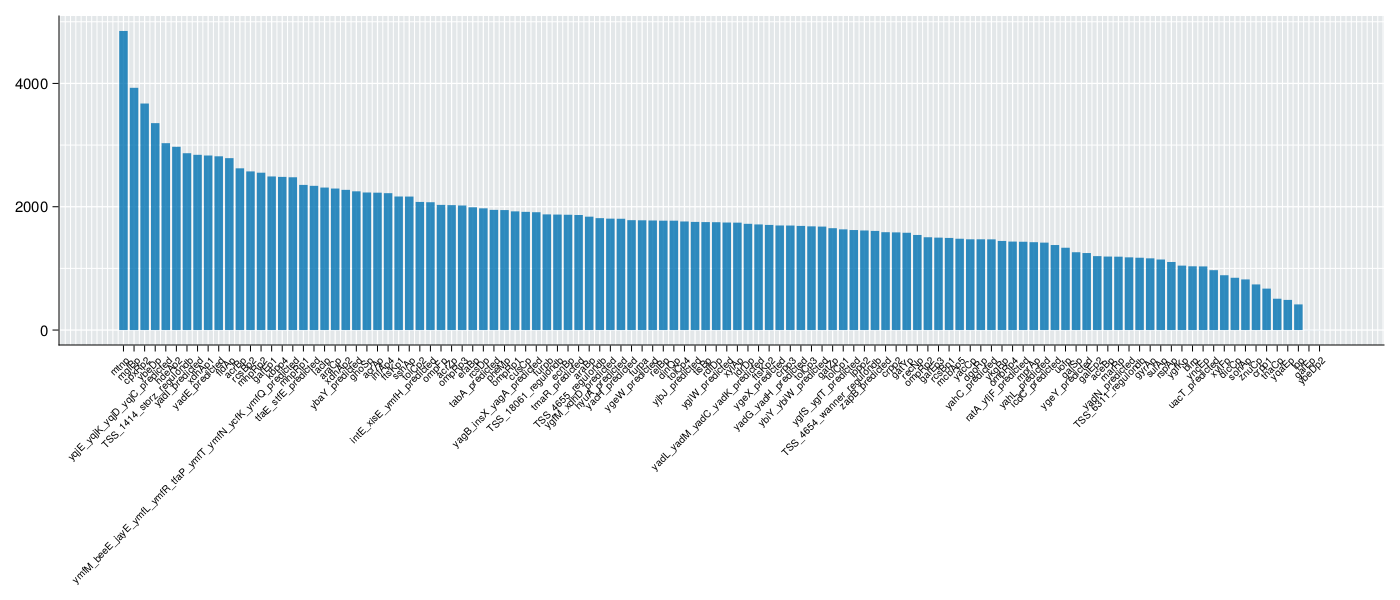

In [41]:
df_uniq_prom = sort(combine(groupby(df, [:name]), :promoter => num_unique), :promoter_num_unique, rev=true)
fig = Figure(resolution=(1400, 600))
ax = Axis(fig[1, 1])

ax.xticks = (1:nrow(df_uniq_prom), df_uniq_prom.name)
ax.xticklabelrotation = pi/4
ax.yticklabelsize = 15

barplot!(ax, df_uniq_prom.promoter_num_unique)
fig

In [25]:
combine(groupby(combine(groupby(df, [:name, :promoter]), nrow => :number_barcodes), :name), :number_barcodes => mean)

,name,number_barcodes_mean
,String,Float64
1,rdlDp,1.87479
2,yadE_predicted,2.20866
3,ybiY_ybiW_predicted,1.64362
4,galEp2,1.5146
5,ghoSp,2.1143
6,araCp,2.39434
7,gatYp,1.72877
8,ompRp2,1.62525
9,galEp1,1.61381


In [28]:
combine(groupby(df, [:name, :promoter]), nrow => :number_barcodes)[:, [:number_barcodes, :name, :promoter]]

,number_barcodes,name,promoter
,Int64,String,String
1,1,rdlDp,AATGCCAGTAATAACCGGAGCCGCTAAATCATGACAGAAGGCCATGCCCAGCTCTGTCAACGACATATAGCTGCCTGTGTTGTAATTACAACGTTTTGCGGCTATTCTTGAGTGGTCTAGAGTCTTGATTAGCCCCCTTGGTGTTGTCAAGAGCTTACTT
2,1,yadE_predicted,CGGAGGTGAGTAGTATTAGGCGCCAACACCAAAAAAATCCGCCTTTCGTCCTAAAAAATAATTTATAAGAGTATTAACACGCCATTCTGAAGGCGCTTTTGCTACAATTAAAGCGTTGTTTCACTCTCGGTTATATTTTCATGTGCAAACGAGCTGTTGT
3,1,ybiY_ybiW_predicted,GAAGTATTCAGGTACAGTCCCATAACCACCCTCAATATGTACTTTTTGTATGACTGAAGACTATCACTGGAACACTCTCTGGACAGTTGACGCACGTCAATTCAACTTTCCTTCGAAAGTATTTTAATGCTTCAAGGAAATAGAGAGGCAACTATGATTT
4,2,galEp2,ACGCTCCGTTTTATAATCACTTCATCGAGCATAAAAAACGGCTAAATTCTTGGGTAAACGATTCCACTAATTTATACCATGTCACAATTTTCGCATCTTTGTTATGCTATCGTTATGTCGGACCATAAGCCAAATGGAGCGAACTATGTGGGTGCTGGTT
5,4,ghoSp,GCACAAAGAATGGGCAGGGAGCCCTTCGTTTTGTCCCAAGTCATCCCCTTTACTGAGCAAAAAAAAGTATATCTTCTATATGAGAAGCATCAATCGGAGTTAATAAGTTTAGCGTCCCCAGAGCTTTTAATATTGATAGGATTACTATTATGGACGGTGA
6,2,araCp,GTCATGTAGCATCCGCTAATCTTATGGATAAAAATACTATGGCTTAGCAGAGTGTGACACCGTGCAAATAATCGAAGTGGGCTTTTCTGCCGTGATTATAGTCACTTTTGATACGCGTTTTTGCCTTGGCTTTGGTCCCGCTTTGTTACATAATGCTGGT
7,1,galEp2,ACCCTCTGTTTTTGAATCACTTCAACGCGCATAAAAAACGGCTAAATTCTTGTGTAAAAGATTCCACTAATTCATTCCATGTCACACTATCCGCATCTTAGTTATGCTATGGTGATTTCATAACATAAGCCTAAAGGAGCGAAGTCTGAGTGTTCTGTCT
8,2,gatYp,GGCTTGGCTGTCGGGAGGCCGTTTTTTTTCCTTTCACTCGTCGAATAGTTTACATATTGTCTTTATTGTGATCGTTATCTCGATATTTAAAAACAGATAATTTCATTATATTTTGAAATCGAAAACAGACGACGGGATTTGAAGAGGTACTTGGTATCGA
9,1,ompRp2,GTTTGTCCGTTTGATAATGCGCACATTGGGTATACGGTGATAATGTCAACAAAAGCAAGAATGTTTCGCCGAATAAATTGTGGACTTAAGCTGGTGTTTAATATGCTTTGTAACGATTTAGGCTGAAACTCATACCAGGTTTAGCCGGTGGCGAACGTGA


In [50]:
df = CSV.read(
    "../../../data/processed_barcodes/20221114_barcode/LB_identified.txt", 
    DataFrame, 
    ignorerepeated=true, 
    delim=" ",
    )
for group in groupby(df, [:name])
    name = unique(group.name)[1]
    CSV.write("../../../data/processed_barcodes/20221114_barcode/LB_by_promoter/$(name)_counts.csv", group)
end

df = CSV.read(
    "../../../data/processed_barcodes/20221114_barcode/Etoh_identified.txt", 
    DataFrame, 
    ignorerepeated=true, 
    delim=" ",
    )
for group in groupby(df, [:name])
    name = unique(group.name)[1]
    CSV.write("../../../data/processed_barcodes/20221114_barcode/Etoh_by_promoter/$(name)_counts.csv", group)
end

df = CSV.read(
    "../../../data/processed_barcodes/20221114_barcode/Gluc_identified.txt", 
    DataFrame, 
    ignorerepeated=true, 
    delim=" ",
    )
for group in groupby(df, [:name])
    name = unique(group.name)[1]
    CSV.write("../../../data/processed_barcodes/20221114_barcode/Gluc_by_promoter/$(name)_counts.csv", group)
end

df = CSV.read(
    "../../../data/processed_barcodes/20221114_barcode/XyAr_identified.txt", 
    DataFrame, 
    ignorerepeated=true, 
    delim=" ",
    )
for group in groupby(df, [:name])
    name = unique(group.name)[1]
    CSV.write("../../../data/processed_barcodes/20221114_barcode/XyAr_by_promoter/$(name)_counts.csv", group)
end